 # Bike Sharing Assignment

## Business Objective

#### Build a multiple linear regression model for the prediction of demand for shared bikes based on the provided variables as per the description mentioned in Data Dictionary

In [1]:
### importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Loading the data
day = pd.read_csv("day.csv")

In [3]:
### Checking the top 5 records
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
### Checking the size of the data
day.shape

(730, 16)

In [5]:
### Checking the type of data in columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
### checking the statistics of numerical columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
### Checking missing values in columns
100*day.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
#checking the number of unique values in each column
for i in day.columns:
    print(i, day[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [9]:
### clearly columns 'instant' and 'dteday' as per data dictionary and above unqiue check seems to be irrelevantfor analysis as it doesnot have any pattern or significance.
### Hence, dropping these 2 columns

day.drop(['instant','dteday'], axis = 1, inplace = True)

In [10]:
### As per data dictionary 'casual' & 'registered' column values are combined and displayed under 'cnt' column.
### Hence, for our model building 'cnt' will be the target column and will be dropping the other 2 

day.drop(['casual','registered'], axis = 1, inplace = True)

In [11]:
### checking the shape of the data after droppping above columns
day.shape

(730, 12)

In [12]:
#checking the number of unique values in each column
for i in day.columns:
    print(i, day[i].nunique())

season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
cnt 695


In [13]:
### Checking the type of data in columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
### Creating a list of continuous columns:
cont_cols = ['temp','atemp','hum','windspeed','cnt']

<Figure size 1440x1296 with 0 Axes>

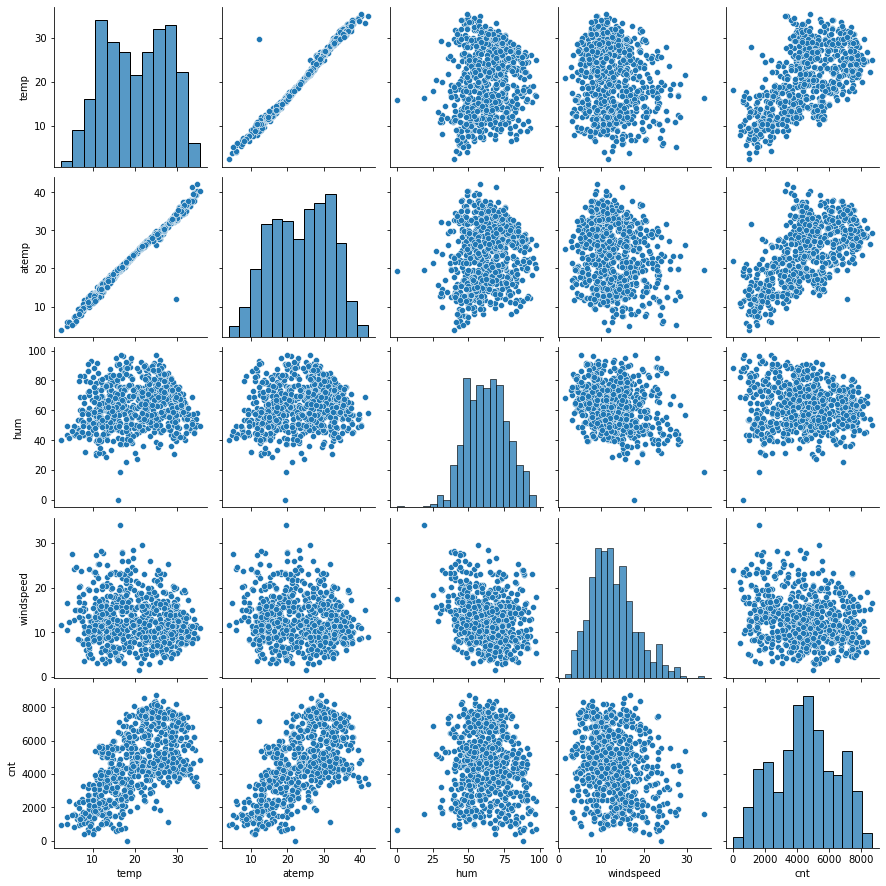

In [15]:
### Visualizing the variance of cont_cols with cnt column using pairplot
plt.figure(figsize = (20,18))
sns.pairplot(data = day, vars = cont_cols)
plt.show()

### Insights : 
    1. Variable 'temp' and 'atemp' shows a linear trend with respect to 'cnt', so linear regression model might be applicable to justify the variances
    2. Also, variables 'temp' and 'atemp' displays a high linear correlation

<AxesSubplot:>

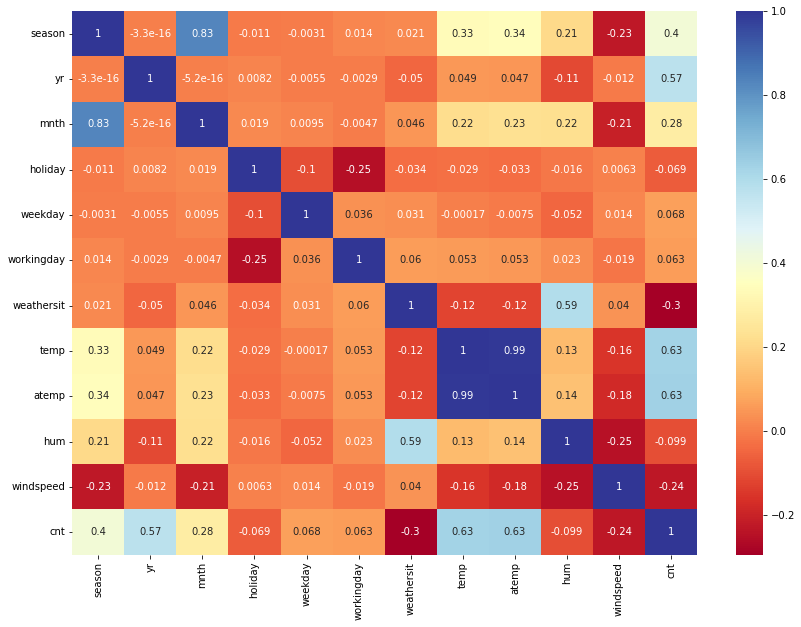

In [16]:
### As per above graph there seems to be correlation between some variables especially 'temp' and 'atemp'. Hence will create a heatmap to understand the correlation

plt.figure(figsize = (14,10))
sns.heatmap(day.corr(), annot = True, cmap ='RdYlBu')


### Insights:
        1. As expected, 'temp' and 'atemp' are highly correlated
        2. 'windspeed', 'hum','weathersit','holiday' shows a negative correlation with 'cnt'
        3. 'temp' and 'atemp' shows the maximum correlation with 'cnt'

In [17]:
### Since 'temp and 'atemp' display high correlation and as per data dictionary the 2 variables are kind of similar, so we can drop 'atemp' as keeping both variables might result in multicollinearity:

day.drop('atemp', axis = 1, inplace = True)

In [18]:
### Making a list of categorical columns:

cat_cols = ['season', 'yr','mnth','weekday','workingday','holiday','weathersit']

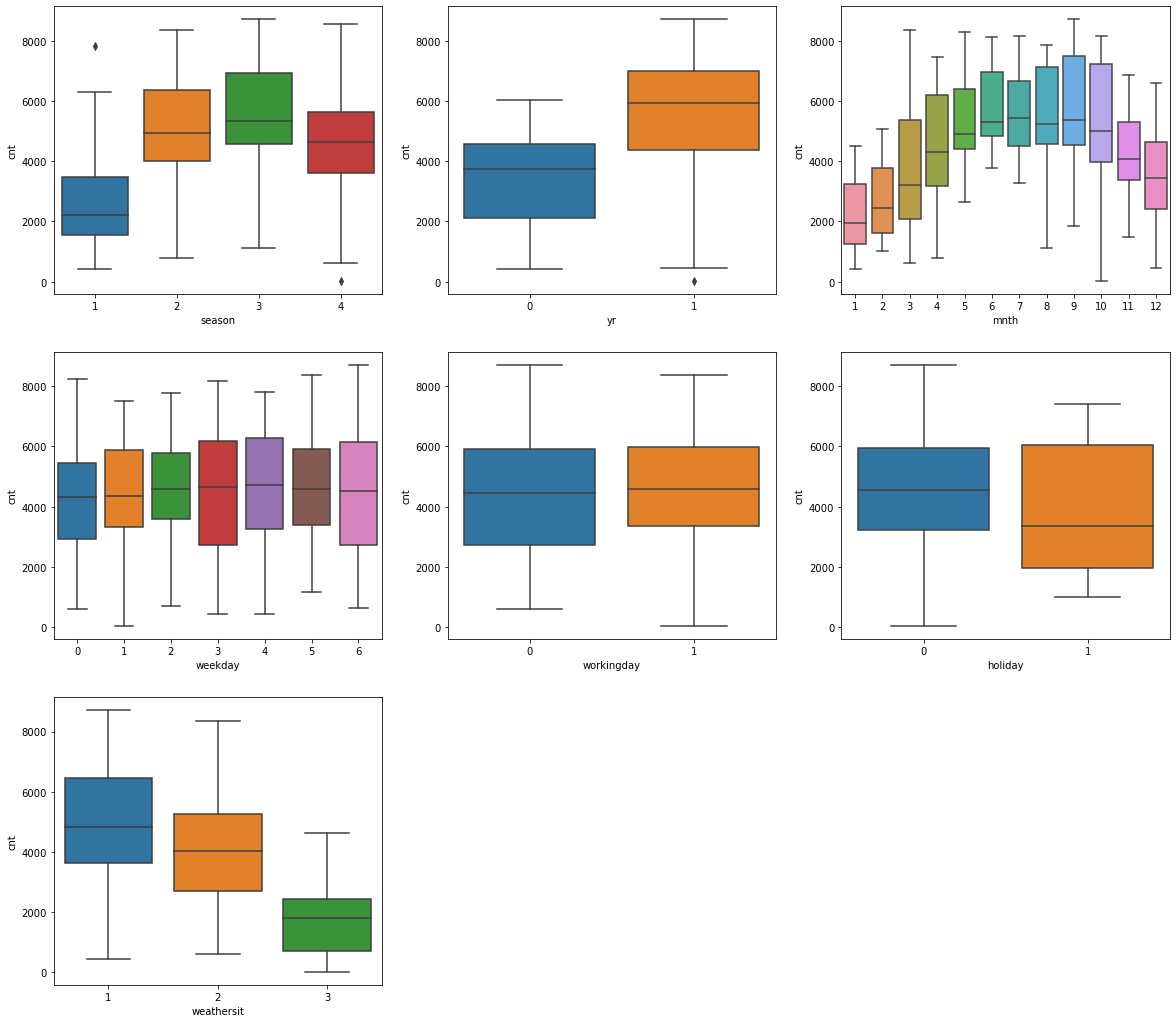

In [19]:
### Visualizing the variance of cat_cols with cnt column using boxplot

plt.figure(figsize = (20,18))

for i in range(0,len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = cat_cols[i], y = 'cnt', data = day)
plt.show()
    

### Insights:
      1. Season : 'season' = 2 & 3 shows a higher increase in 'cnt ' with 50th percentile above 5k
      2. yr : 'yr' = 1 (i.e. 2019 year) shows an increase in 'cnt'
      3. mnt : 'mnth' = 5, 6, & 7 indicates major increase in 'cnt' as 25th percentile is pretty high over 3k. Also 8, 9 & 10 have higher increase in 'cnt' from 50th to 75th percentiles over 5K
      4. weekday : 'weekday' trend seems to be almost similar for all values
      5. holiday : Although 'holiday' = 1(i.e. not a holiday) has increase in 'cnt' from 50th to 75th percentiles but not that significant
      6. workingday : 'workingday' = 0 (i.e. non-working days) shows more records for 'cnt' 
      7. weathersit : 'weathersit' = 1  has positive influence in 'cnt' folowed by 2 & 3.
        
### Based on the above points we can assume that:
'season','yr','mnth', 'workingday','weathersit','holiday' does have some impact on the bookings i.e. 'cnt' in some positive way


### Creating Dummy Variables

Since as part of model building we need to have numerical variables for better analysis
From cat_cols we can see that 'yr','workingday' & 'holiday' have values only 0 & 1 so that's good for our analysis but columns 'season', 'weekday','mnth' & 'weathersit' have multiple values, so will be creating Dummy variables for these to cover all possible combinations 

Creating Dummy variables for 'season', 'weekday','mnth' & 'weathersit'


In [20]:
### Storing these columns in a list:
dummy_list = ['season','weekday','mnth','weathersit']

In [21]:
### Coverting the dtype for these columns to category
for i in dummy_list:
    day[i] = day[i].astype('category')

In [22]:
### Verifying the dtype change is successful:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [23]:
### Creating Dummy variables and storing them in a new dataframe
dummies = pd.get_dummies(day[dummy_list],drop_first = True)

In [24]:
### Checking if dummy creation is successful
dummies.head()

,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
### Concatenating the dummies dataframe to the original one 
day = pd.concat([day,dummies] , axis = 1)

In [26]:
### Checking the day dataframe after concatenation:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [27]:
### Since we have already created the dummies for dummy_list cols so we can drop the original ones present in the dataframe
day = day.drop(dummy_list , axis = 1)

In [28]:
### Checking the overall dataframe:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  weekday_1     730 non-null    uint8  
 11  weekday_2     730 non-null    uint8  
 12  weekday_3     730 non-null    uint8  
 13  weekday_4     730 non-null    uint8  
 14  weekday_5     730 non-null    uint8  
 15  weekday_6     730 non-null    uint8  
 16  mnth_2        730 non-null    uint8  
 17  mnth_3        730 non-null    uint8  
 18  mnth_4        730 non-null    

In [29]:
### Verifying the shape of the dataframe
day.shape

(730, 29)

In [30]:
### importing the libraries for train_test_split:
import sklearn
from sklearn.model_selection import train_test_split


In [31]:
## Creating the Train-Test Split of the dataframe using sklearn library
day_train, day_test = train_test_split(day, train_size = 0.7 , random_state = 600)

In [32]:
## checing the shape of train and test dataframe after splitting
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


### Rescaling the data
Rescaling the train data for variables cont_cols (i.e.'temp','hum','windspeed','cnt') using min-max scaler to fit in the same scale as the other variables

In [33]:
### removing atemp from cont_cols list as we have dropped this column
cont_cols.remove('atemp')

In [34]:
# importing required module for scaling the data
from sklearn.preprocessing import MinMaxScaler

In [35]:
#applying the min-max scaler to the cont_cols on train set:

## instantiate an object 
scaler = MinMaxScaler()

## fitting the min max scaler on cont_cols:
day_train[cont_cols] = scaler.fit_transform(day_train[cont_cols])

In [36]:
### Checking the train data after scaling:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
667,1,0,1,0.322791,0.797610,0.485763,0.123562,0,0,1,...,0,0,0,0,0,1,0,0,1,0
131,0,0,1,0.592957,0.688772,0.426279,0.557064,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0.114266,0.319372,0.511904,0.149448,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1,0,1,0.256524,0.429900,0.437415,0.438104,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,1,0,0,0.884740,0.556137,0.683037,0.626093,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
### verifying if the scaling was done correctly
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.029412,0.684314,0.539681,0.527628,0.420710,0.517550,0.245098,0.258824,0.256863,...,0.082353,0.064706,0.090196,0.080392,0.084314,0.090196,0.090196,0.082353,0.335294,0.029412
std,0.500456,0.169124,0.465245,0.226266,0.194653,0.190190,0.222814,0.430568,0.438419,0.437332,...,0.275172,0.246248,0.286744,0.272166,0.278131,0.286744,0.286744,0.275172,0.472557,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352314,0.386998,0.280905,0.364588,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.529616,0.529959,0.404128,0.522204,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741963,0.668266,0.531468,0.692706,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see above all columns have min = 0 and max = 1, hence scaling is done as expected

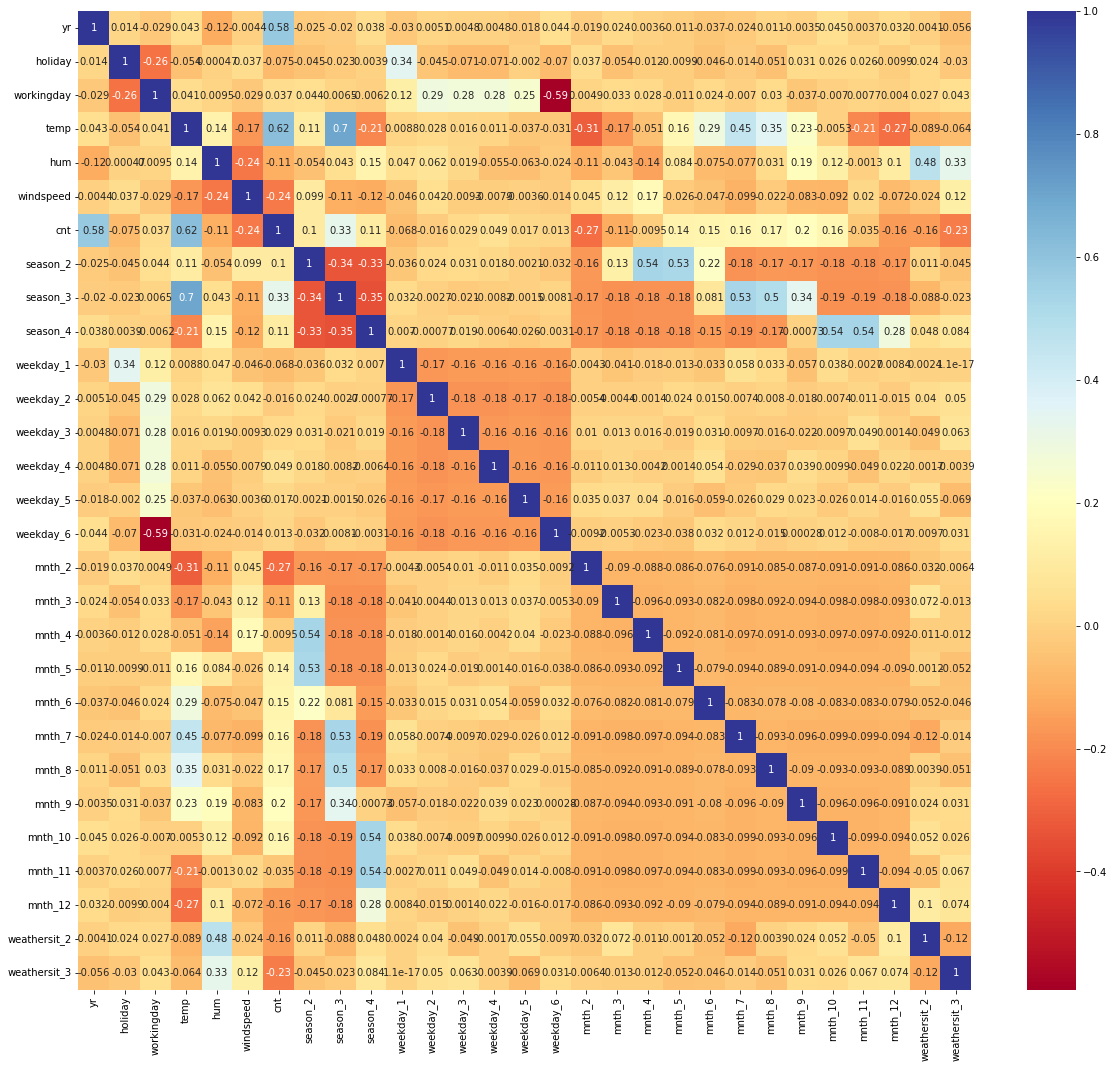

In [38]:
### preparing a heat map and take a look at the correlations between the variables in train set:
plt.figure(figsize=(20,18))
sns.heatmap(day_train.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

Insight:
    Target variable 'cnt' shows comparitively higher positive correlation with 'yr','temp','season_3'
    Target variable 'cnt' shows comparitively lower correlation with 'windspeed','mnth_2','weathersit_3'

### Creating X and y from the training set for model building

In [39]:
### assigning X_train and y_train
y_train = day_train.pop('cnt')
X_train = day_train

In [40]:
### Checking the shape of X_train & y_train
print(X_train.shape)
print(y_train.shape)


(510, 28)
(510,)


### Model Building

Since here we have 28 features for analysis in we will first be using automated process through RFE (Recursive Feature Elemination)

In [41]:
### importing RFE and linear regression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
### creating linear regression model instance
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [43]:
### Running RFE to get the top 15 features 
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 11),
 ('weekday_4', False, 10),
 ('weekday_5', False, 9),
 ('weekday_6', False, 12),
 ('mnth_2', False, 13),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 14),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [45]:
### taking the columns for which rfe.support_ is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_3'],
      dtype='object')

In [46]:
### checking columns RFE didnot select
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_7', 'mnth_8',
       'mnth_10', 'weathersit_2'],
      dtype='object')

### Building model using statsmodel , for detailed statistics

In [47]:
### Creating X_train dataframe with RFE selected features
X_train_rfe = X_train[col]

In [48]:
## Adding constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
## Running Linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [50]:
## checking the summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.37e-187
Time:                        22:40:11   Log-Likelihood:                 514.92
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2286      0.022     10.426   

Now we have the significance (p-value) all the features but before making an decision to drop any of the variables we need to check the VIF for all these variables

### Checking the VIF

In [51]:
### importing required module from statsmodels library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
## Create a dataframe that will contain the RFE selected feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [53]:
### displaying the vif
vif

,Features,VIF
0,const,30.55
6,season_3,5.87
5,season_2,5.83
2,temp,4.43
10,mnth_5,3.41
9,mnth_4,3.34
7,season_4,3.19
11,mnth_6,1.92
13,mnth_11,1.73
8,mnth_3,1.64


Compairing the p-value and VIF we can see that 'mnth_4' has a high p-value so we will be dropping this column first
Note: For model building we will consider p-value > 0.005 as high

In [54]:
X_train_rfe2 = X_train_rfe.drop('mnth_4', axis = 1)

### Creating another Model

#### Model2

In [55]:
## Adding constant variable
import statsmodels.api as sm
X_train_rfe2 = sm.add_constant(X_train_rfe2)
## Running Linear Model
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [56]:
## checking the summary of linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          6.84e-188
Time:                        22:40:19   Log-Likelihood:                 512.91
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     495   BIC:                            -932.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2305      0.022     10.493   

From above model we can see that mnth_6 has a pretty high p-value , so we will drop mnth_6

In [57]:
X_train_rfe3 = X_train_rfe2.drop('mnth_6', axis = 1)

#### Model3

In [58]:
## Adding constant variable
X_train_rfe3 = sm.add_constant(X_train_rfe3)
## Running Linear Model
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [59]:
## checking the summary of linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          9.38e-189
Time:                        22:40:22   Log-Likelihood:                 512.20
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     496   BIC:                            -937.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2288      0.022     10.435   

We can see in Model 3 the p-values of all features are quite low except for mnth_3, so we will drop 'mnth_3'

In [60]:
X_train_rfe4 = X_train_rfe3.drop('mnth_3', axis = 1)

#### Model4

In [61]:
## Adding constant variable
X_train_rfe4 = sm.add_constant(X_train_rfe4)
## Running Linear Model
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [62]:
## checking the summary of linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          9.89e-189
Time:                        22:40:25   Log-Likelihood:                 509.34
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     497   BIC:                            -937.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2331      0.022     10.619   

Now since all all p-values are less than 0.005 will check the vif for the features

In [63]:
## Create a dataframe that will contain the model4 feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values,i) for i in range (X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,30.15
6,season_3,5.42
2,temp,3.90
7,season_4,2.93
5,season_2,2.74
10,mnth_11,1.72
8,mnth_5,1.48
3,hum,1.37
11,mnth_12,1.36
9,mnth_9,1.23


Compairing the VIF we can see that 'season_3' has a pretty high VIF (in general VIF > 2, will be considered high). So dropping 'season_3'

In [64]:
X_train_rfe5 = X_train_rfe4.drop('season_3', axis = 1)

#### Model5

In [65]:
## Adding constant variable
X_train_rfe5 = sm.add_constant(X_train_rfe5)
## Running Linear Model
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

In [66]:
## checking the summary of linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          5.58e-187
Time:                        22:40:31   Log-Likelihood:                 502.36
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     498   BIC:                            -929.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2189      0.022      9.999   

Again we can see 'mnth_5' and 'mnth_11' have high p-values . Let's compare the VIF for these 2 and decide which one to drop

In [67]:
## Create a dataframe that will contain the model5 feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values,i) for i in range (X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,29.23
6,season_4,1.82
9,mnth_11,1.64
5,season_2,1.58
7,mnth_5,1.44
3,hum,1.36
10,mnth_12,1.33
2,temp,1.28
11,weathersit_3,1.19
4,windspeed,1.17


We can see that 'mnth_11' has a high VIF compared to 'mnth_5' so will proceed with dropping 'mnth_11'

In [68]:
X_train_rfe6 = X_train_rfe5.drop('mnth_11', axis = 1)

#### Model6

In [69]:
## Adding constant variable
X_train_rfe6 = sm.add_constant(X_train_rfe6)
## Running Linear Model
lm6 = sm.OLS(y_train,X_train_rfe6).fit()

In [70]:
## checking the summary of linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.95e-187
Time:                        22:40:50   Log-Likelihood:                 500.15
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     499   BIC:                            -931.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2142      0.022      9.804   

Here, we can see that the p-value for 'mnth_5'  & 'mnth_12' is high, will compair the VIF

In [71]:
## Create a dataframe that will contain the model4 feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values,i) for i in range (X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,28.92
5,season_2,1.57
7,mnth_5,1.44
3,hum,1.36
6,season_4,1.26
2,temp,1.25
10,weathersit_3,1.19
9,mnth_12,1.18
4,windspeed,1.16
8,mnth_9,1.14


Clearly 'mnth_5' has high p-value and high VIF. So will drop it.

In [72]:
X_train_rfe7 = X_train_rfe6.drop('mnth_5', axis = 1)

#### Model7

In [73]:
## Adding constant variable
X_train_rfe7 = sm.add_constant(X_train_rfe7)
## Running Linear Model
lm7 = sm.OLS(y_train,X_train_rfe7).fit()

In [74]:
## checking the summary of linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     275.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.26e-187
Time:                        22:40:56   Log-Likelihood:                 497.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     500   BIC:                            -932.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2091      0.022      9.581   

The p-value for 'mnth_12' is greater than 0.005. So will be dropping 'mnth_12'

In [75]:
X_train_rfe8 = X_train_rfe7.drop('mnth_12', axis = 1)

#### Model8

In [76]:
## Adding constant variable
X_train_rfe8 = sm.add_constant(X_train_rfe8)
## Running Linear Model
lm8 = sm.OLS(y_train,X_train_rfe8).fit()

In [77]:
## checking the summary of linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     306.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.86e-187
Time:                        22:41:01   Log-Likelihood:                 494.76
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     501   BIC:                            -933.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2026      0.022      9.319   

Now, all features have p-value 0. We will now check the VIF for these features

In [78]:
## Create a dataframe that will contain the model8 feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values,i) for i in range (X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,28.15
3,hum,1.32
6,season_4,1.22
2,temp,1.18
5,season_2,1.18
8,weathersit_3,1.18
4,windspeed,1.16
7,mnth_9,1.13
1,yr,1.02


All the vif's are also within the acceptable range. So, we can consider Model8 as the relevant one.

### Insights from Model8:
    1. Model8 has a pretty good R-squared value of : 0.830
    2. Adjusted R-squared is also good : 0.828
    3. p-values for all the features are 0
    4. VIF for the features are also below 2
    5. F-statistic is high : 306.3, indicating it's a good fit model

### Residual Analysis

Performing a residual analysis of the error terms to be certain that the model is reliable

In [79]:
## storing the predicted values of y based on prediction made by model8
y_train_pred = lm8.predict(X_train_rfe8)


In [80]:
## Calculating and storing the residuals
res = y_train - y_train_pred

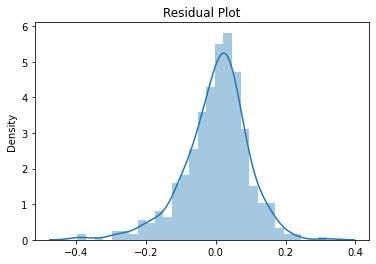

In [81]:
## visualizing the distribution of residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

We can see that the residuals are centered around zero and normally distributed

const


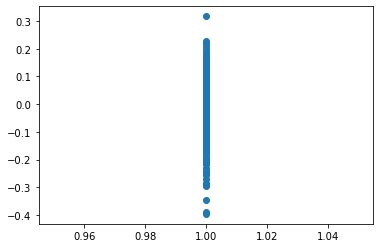

yr


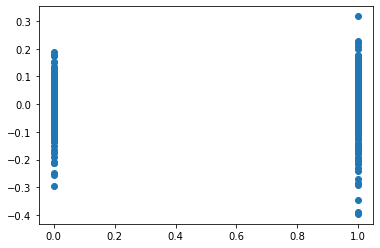

temp


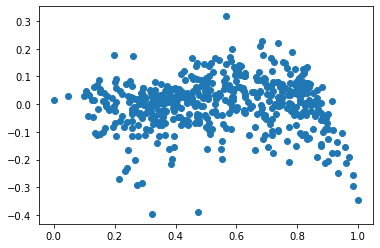

hum


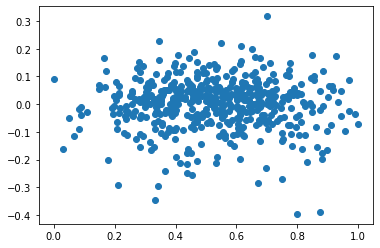

windspeed


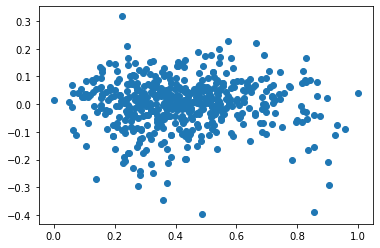

season_2


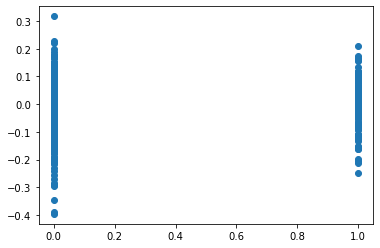

season_4


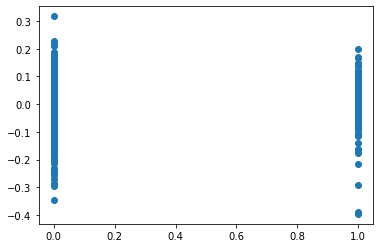

mnth_9


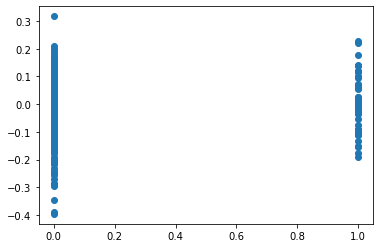

weathersit_3


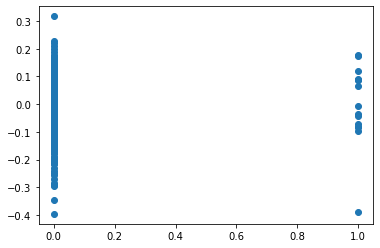

In [82]:
# we should not be able to identify any patterns in residuals

for i in X_train_rfe8.columns:
    plt.scatter(X_train_rfe8[i], res)
    print(i)
    plt.show()

The residual distribution for all the features display no specific pattern

### Predictions and Evaluation on the test set

In [83]:
#applying the min-max scaler to the cont_cols on test set for scaling the data:

## fitting the min max scaler on cont_cols:
day_test[cont_cols] = scaler.transform(day_test[cont_cols])

In [84]:
## Verifying variables are scaled correctly
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.513636,0.027273,0.681818,0.553522,0.507111,0.446247,0.512765,0.268182,0.254545,0.213636,...,0.090909,0.122727,0.072727,0.095455,0.077273,0.072727,0.063636,0.090909,0.340909,0.027273
std,0.500954,0.163248,0.466833,0.232660,0.207778,0.213256,0.223024,0.444023,0.436599,0.410808,...,0.288135,0.328872,0.260281,0.294512,0.267633,0.260281,0.244661,0.288135,0.475096,0.163248
min,0.000000,0.000000,0.000000,0.047675,-0.354858,0.077672,0.069144,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.330271,0.348951,0.301111,0.360044,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.599232,0.504072,0.401746,0.518063,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.653672,0.554681,0.665842,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.965734,1.002908,1.236139,0.937069,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
### assigning X_test and y_test
y_test = day_test.pop('cnt')
X_test = day_test

In [86]:
## storing the columns from model8 and dropping const column
col_list = X_train_rfe8.columns


In [87]:
## dropping the columns that are not part of the final model8
X_test = X_test[col_list.drop('const')]

In [88]:
## adding constant to X_test
X_test_lm8 = sm.add_constant(X_test)

In [89]:
X_test_lm8.head()

,const,yr,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
712,1.0,1,0.277292,0.542757,0.277357,0,1,0,0
346,1.0,0,0.278329,0.468877,0.301111,0,1,0,0
505,1.0,1,0.671873,0.777777,0.537227,1,0,0,0
684,1.0,1,0.356208,0.377544,0.378772,0,1,0,0
149,1.0,0,0.840090,0.601512,0.277347,1,0,0,0


In [90]:
# predict
y_test_pred = lm8.predict(X_test_lm8)

#### R-squared value for test set

In [91]:
## importing required module from sklearn

from sklearn.metrics import r2_score


In [92]:
## calculate r2 for test data set
r2 = r2_score(y_test,y_test_pred)
r2

0.7911440407813919

#### Adjusted R-squared for test set

In [93]:
# storing the number of rows of the test set
n = X_test_lm8.shape[0]

In [94]:
# storing the number of predicted features for the test set
p = X_test_lm8.shape[1]

In [95]:
# calculating adjusted R squared
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7821930711005944

The R-squared value for test set is 0.791 which is quite comaparble to the train set R-square which is 0.830                
The Adjusted R-squared value for test set is 0.782 which is quite comaparble to the train set R-square which is 0.828

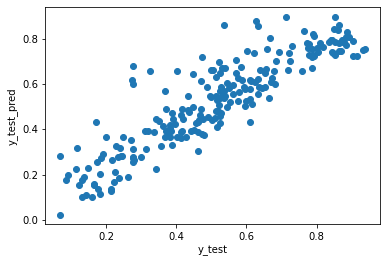

In [96]:
## plotting y_test and y_test_pred to visualize the distribution
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### Conclusion:
    The final model equation will be :
        cnt = 0.2026 + (yr*0.2308) + (temp*0.5977) - (hum*0.2192) - (windspeed*0.1654) + (season_2*0.0864) + (season_4*0.1487) + (mnth_9*0.0990) - (weathersit_3*0.1422)
        

#### Below are the predictor variables indentified by the Model:
    yr
    temp
    hum
    windspeed
    season_2
    season_4
    mnth_9
    weathersit_3

### Final Model Interpretation

###### As per the final model, the top predictor variables are:
    1. yr : A coefficient value of 0.2308 indicates that a unit increase in yr increases the bike bookings by 0.2308 units
    2. temp : Unit increase in temperature increases bike hiring by 0.5977 units
    3. hum : increase in humidity by a unit decreases the bike hiring by 0.2192 units
    4. windspeed : bike bookings decreases by 0.1654 units with unit increase in windspeed
    5. season_4 : i.e 'Winter' season as per data dictionary indicates bike hiring increase by 0.1487 units
    6. weathersit_3 : unit increase in weather situation3 i.e Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds decrease bike hiring by 0.1422 units
    7. mnth_9 : September month sees an increase in bike hiring by 0.0990 units
    8. season_2 : Summer season impacts the bike hiring with an increase by 0.0864 units